In [9]:
# Imports
%load_ext autoreload
%autoreload 2

from os.path import exists
from pathlib import Path

import math

import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn # Includes all modules, nn.Linear, nn.Conv2d, BatchNorm etc
import torch.optim as optim # Is used for otimization algorithms such as Adam, SGD ...
from torch.utils.data import DataLoader # Helps with managing datasets in mini batches
from torch.utils.data import Dataset

import torchvision
import torchvision.datasets as datasets # Has standard datasets
import torchvision.transforms as transforms # Transformations to be used on images
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models import vgg19

from itertools import chain
from PIL import Image

from model import Generator, Discriminator # Models
from loss import VGGContentLoss
from datahandler import DataHandler
from modelhandler import ModelHandler
from utils import display_image, save_result_images
from train import train_loop
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
print("cuda is available: " + str(torch.cuda.is_available()))
device = config.DEVICE
print("Device is set to: " + str(config.DEVICE))
print(config.CONTENT_CRITERION.feature_layers)

cuda is available: True
Device is set to: cuda
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1

Text(0.5, 1.0, 'High res (96 x 96 px)')

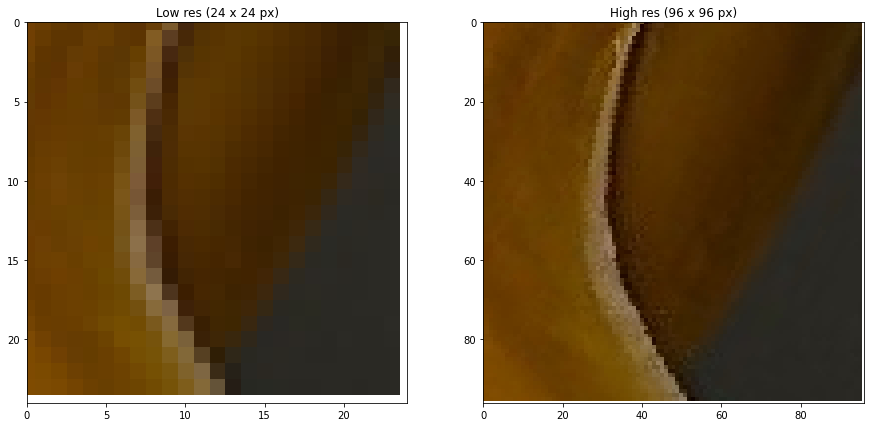

In [3]:
# The Dataset constructor has a transform attribute, we will cover it below. Just use this for now:
high_res_size = 96
low_res_size = 24

example_dataset = DataHandler("./dataset/", high_res_size ,low_res_size);
fig, axis = plt.subplots(1,2, figsize=(15,15))
some_random_index = 4
high_res_image_tensor, low_res_image_tensor = example_dataset[some_random_index]
display_image(axis[0], low_res_image_tensor)
axis[0].set_title('Low res (' + str(low_res_size) + ' x ' + str(low_res_size) + ' px)')
display_image(axis[1], high_res_image_tensor, reverse_normalization = True)
axis[1].set_title('High res (' + str(high_res_size) + ' x ' + str(high_res_size) + ' px)')

In [4]:
# Initialize models (with ModelHandler)
model_handler = ModelHandler()
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = model_handler.load_models()

# Initialize data
datahandler = DataHandler("./dataset/", config_dict['HIGH_RES_SIZE'] ,config_dict['LOW_RES_SIZE']);
train_dataloader = DataLoader(datahandler, batch_size=config_dict['BATCH_SIZE'], shuffle=True)

Load procedure initialized..
Enter stem of path (leave empty for new models): 
Loading models from scratch
high_res_size:           96
low_res_size:            24
scaling_factor:          2
batch_size:              32
num_epochs_train:        150
num_epochs_pretrain:     50
gen_lr:                  0.0001
gen_lr_pretrain:         0.001
disc_lr:                 0.0001
use_inception_blocks:    False
pixel_weight:            0.001
content_weight:          0.008
adversarial_weight:      0.005


In [5]:
# TRAINING TIME!
# Generator training (Pretraining)
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = train_loop(train_dataloader, generator, discriminator,  disc_opti, gen_opti, gen_opti_pretrain, config_dict, adversarial=False)

# Adversarial training (Regular Training)
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = train_loop(train_dataloader, generator, discriminator,  disc_opti, gen_opti, gen_opti_pretrain, config_dict, adversarial=True)

##################
Starting GENERATOR training
##################


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][50/157]	Loss_G: 0.0561


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][100/157]	Loss_G: 0.0794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][150/157]	Loss_G: 0.0483


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][50/157]	Loss_G: 0.0545


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][100/157]	Loss_G: 0.0454


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][150/157]	Loss_G: 0.0299


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][50/157]	Loss_G: 0.0336


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][100/157]	Loss_G: 0.0334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][150/157]	Loss_G: 0.0310


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][50/157]	Loss_G: 0.0345


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][100/157]	Loss_G: 0.0291


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][150/157]	Loss_G: 0.0281


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][50/157]	Loss_G: 0.0224


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][100/157]	Loss_G: 0.0232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][150/157]	Loss_G: 0.0251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][50/157]	Loss_G: 0.0333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][100/157]	Loss_G: 0.0206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][150/157]	Loss_G: 0.0261


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][50/157]	Loss_G: 0.0240


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][100/157]	Loss_G: 0.0398


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][150/157]	Loss_G: 0.0261


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][50/157]	Loss_G: 0.0280


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][100/157]	Loss_G: 0.0222


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][150/157]	Loss_G: 0.0266


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][50/157]	Loss_G: 0.0216


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][100/157]	Loss_G: 0.0238


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][150/157]	Loss_G: 0.0242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][50/157]	Loss_G: 0.0177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][100/157]	Loss_G: 0.0267


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][150/157]	Loss_G: 0.0179


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][50/157]	Loss_G: 0.0196


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][100/157]	Loss_G: 0.0252


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][150/157]	Loss_G: 0.0286


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][50/157]	Loss_G: 0.0254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][100/157]	Loss_G: 0.0246


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][150/157]	Loss_G: 0.0238


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][50/157]	Loss_G: 0.0230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][100/157]	Loss_G: 0.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][150/157]	Loss_G: 0.0215


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][50/157]	Loss_G: 0.0144


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][100/157]	Loss_G: 0.0192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][150/157]	Loss_G: 0.0192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][50/157]	Loss_G: 0.0246


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][100/157]	Loss_G: 0.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][150/157]	Loss_G: 0.0231


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][50/157]	Loss_G: 0.0275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][100/157]	Loss_G: 0.0258


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][150/157]	Loss_G: 0.0192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][50/157]	Loss_G: 0.0181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][100/157]	Loss_G: 0.0167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][150/157]	Loss_G: 0.0206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][50/157]	Loss_G: 0.0200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][100/157]	Loss_G: 0.0140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][150/157]	Loss_G: 0.0156


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][50/157]	Loss_G: 0.0136


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][100/157]	Loss_G: 0.0277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][150/157]	Loss_G: 0.0168


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][50/157]	Loss_G: 0.0152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][100/157]	Loss_G: 0.0187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][150/157]	Loss_G: 0.0162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][50/157]	Loss_G: 0.0209


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][100/157]	Loss_G: 0.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][150/157]	Loss_G: 0.0168


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][50/157]	Loss_G: 0.0161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][100/157]	Loss_G: 0.0170


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][150/157]	Loss_G: 0.0177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][50/157]	Loss_G: 0.0150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][100/157]	Loss_G: 0.0177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][150/157]	Loss_G: 0.0219


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][50/157]	Loss_G: 0.0170


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][100/157]	Loss_G: 0.0199


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][150/157]	Loss_G: 0.0149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][50/157]	Loss_G: 0.0239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][100/157]	Loss_G: 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][150/157]	Loss_G: 0.0130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][50/157]	Loss_G: 0.0164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][100/157]	Loss_G: 0.0187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][150/157]	Loss_G: 0.0176


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][50/157]	Loss_G: 0.0197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][100/157]	Loss_G: 0.0126


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][150/157]	Loss_G: 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][50/157]	Loss_G: 0.0149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][100/157]	Loss_G: 0.0213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][150/157]	Loss_G: 0.0270


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][50/157]	Loss_G: 0.0157


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][100/157]	Loss_G: 0.0173


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][150/157]	Loss_G: 0.0192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][50/157]	Loss_G: 0.0254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][100/157]	Loss_G: 0.0159


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][150/157]	Loss_G: 0.0186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][50/157]	Loss_G: 0.0217


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][100/157]	Loss_G: 0.0203


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][150/157]	Loss_G: 0.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][50/157]	Loss_G: 0.0175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][100/157]	Loss_G: 0.0157


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][150/157]	Loss_G: 0.0165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][50/157]	Loss_G: 0.0204


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][100/157]	Loss_G: 0.0186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][150/157]	Loss_G: 0.0193


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][50/157]	Loss_G: 0.0200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][100/157]	Loss_G: 0.0153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][150/157]	Loss_G: 0.0162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][50/157]	Loss_G: 0.0163


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][100/157]	Loss_G: 0.0162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][150/157]	Loss_G: 0.0122


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][50/157]	Loss_G: 0.0158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][100/157]	Loss_G: 0.0210


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][150/157]	Loss_G: 0.0192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][50/157]	Loss_G: 0.0277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][100/157]	Loss_G: 0.0164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][150/157]	Loss_G: 0.0191


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][50/157]	Loss_G: 0.0116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][100/157]	Loss_G: 0.0207


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][150/157]	Loss_G: 0.0178


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][50/157]	Loss_G: 0.0206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][100/157]	Loss_G: 0.0127


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][150/157]	Loss_G: 0.0177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][50/157]	Loss_G: 0.0190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][100/157]	Loss_G: 0.0151


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][150/157]	Loss_G: 0.0212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][50/157]	Loss_G: 0.0161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][100/157]	Loss_G: 0.0172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][150/157]	Loss_G: 0.0169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][50/157]	Loss_G: 0.0172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][100/157]	Loss_G: 0.0112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][150/157]	Loss_G: 0.0164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][50/157]	Loss_G: 0.0120


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][100/157]	Loss_G: 0.0178


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][150/157]	Loss_G: 0.0164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][50/157]	Loss_G: 0.0178


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][100/157]	Loss_G: 0.0188


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][150/157]	Loss_G: 0.0190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][50/157]	Loss_G: 0.0230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][100/157]	Loss_G: 0.0142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][150/157]	Loss_G: 0.0197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][50/157]	Loss_G: 0.0149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][100/157]	Loss_G: 0.0163


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][150/157]	Loss_G: 0.0112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][50/157]	Loss_G: 0.0183


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][100/157]	Loss_G: 0.0201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][150/157]	Loss_G: 0.0130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][50/157]	Loss_G: 0.0206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][100/157]	Loss_G: 0.0197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][150/157]	Loss_G: 0.0129


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][50/157]	Loss_G: 0.0163


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][100/157]	Loss_G: 0.0180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][150/157]	Loss_G: 0.0193


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][50/157]	Loss_G: 0.0254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][100/157]	Loss_G: 0.0158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][150/157]	Loss_G: 0.0280
##################
Starting ADVERSARIAL training
##################


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/150][50/157]	Loss_D: 1.3606	Loss_G: 0.0286	D(x): 0.5433	D(G(z)): 0.5260 / 0.5037


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/150][100/157]	Loss_D: 0.9320	Loss_G: 0.0351	D(x): 0.6171	D(G(z)): 0.2958 / 0.2723


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/150][150/157]	Loss_D: 1.0115	Loss_G: 0.0395	D(x): 0.8128	D(G(z)): 0.4799 / 0.2431


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/150][50/157]	Loss_D: 0.8034	Loss_G: 0.0468	D(x): 0.6120	D(G(z)): 0.1412 / 0.1238


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/150][100/157]	Loss_D: 1.1987	Loss_G: 0.0365	D(x): 0.4474	D(G(z)): 0.2278 / 0.2028


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/150][150/157]	Loss_D: 2.1034	Loss_G: 0.0370	D(x): 0.9381	D(G(z)): 0.8068 / 0.5114


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/150][50/157]	Loss_D: 1.5120	Loss_G: 0.0309	D(x): 0.8198	D(G(z)): 0.6959 / 0.2729


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/150][100/157]	Loss_D: 1.1156	Loss_G: 0.0436	D(x): 0.4665	D(G(z)): 0.2635 / 0.2330


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/150][150/157]	Loss_D: 1.1908	Loss_G: 0.0293	D(x): 0.5467	D(G(z)): 0.4136 / 0.4116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/150][50/157]	Loss_D: 1.8769	Loss_G: 0.0444	D(x): 0.2482	D(G(z)): 0.1656 / 0.1907


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/150][100/157]	Loss_D: 1.3881	Loss_G: 0.0320	D(x): 0.6893	D(G(z)): 0.6141 / 0.4072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/150][150/157]	Loss_D: 1.8109	Loss_G: 0.0296	D(x): 0.6584	D(G(z)): 0.7236 / 0.6557


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/150][50/157]	Loss_D: 1.2042	Loss_G: 0.0325	D(x): 0.4252	D(G(z)): 0.2608 / 0.4712


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/150][100/157]	Loss_D: 1.4565	Loss_G: 0.0323	D(x): 0.5442	D(G(z)): 0.5229 / 0.5388


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/150][150/157]	Loss_D: 1.4027	Loss_G: 0.0312	D(x): 0.4624	D(G(z)): 0.4587 / 0.4787


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/150][50/157]	Loss_D: 0.9111	Loss_G: 0.0302	D(x): 0.7634	D(G(z)): 0.4601 / 0.3948


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/150][100/157]	Loss_D: 2.0260	Loss_G: 0.0285	D(x): 0.8794	D(G(z)): 0.8085 / 0.4019


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/150][150/157]	Loss_D: 1.3913	Loss_G: 0.0358	D(x): 0.3863	D(G(z)): 0.3066 / 0.3598


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/150][50/157]	Loss_D: 0.6467	Loss_G: 0.0423	D(x): 0.6178	D(G(z)): 0.1069 / 0.1540


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/150][100/157]	Loss_D: 1.0409	Loss_G: 0.0385	D(x): 0.4427	D(G(z)): 0.1489 / 0.2034


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/150][150/157]	Loss_D: 0.6628	Loss_G: 0.0338	D(x): 0.7794	D(G(z)): 0.3206 / 0.3483


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/150][50/157]	Loss_D: 0.3829	Loss_G: 0.0468	D(x): 0.8386	D(G(z)): 0.1690 / 0.1340


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/150][100/157]	Loss_D: 0.8619	Loss_G: 0.0320	D(x): 0.7754	D(G(z)): 0.4428 / 0.4409


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/150][150/157]	Loss_D: 0.5935	Loss_G: 0.0357	D(x): 0.8691	D(G(z)): 0.3502 / 0.2895


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/150][50/157]	Loss_D: 0.5024	Loss_G: 0.0343	D(x): 0.8438	D(G(z)): 0.2692 / 0.2211


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/150][100/157]	Loss_D: 1.9509	Loss_G: 0.0310	D(x): 0.8210	D(G(z)): 0.8109 / 0.7836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/150][150/157]	Loss_D: 1.4307	Loss_G: 0.0273	D(x): 0.5669	D(G(z)): 0.5330 / 0.4728


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/150][50/157]	Loss_D: 0.9808	Loss_G: 0.0296	D(x): 0.7278	D(G(z)): 0.4703 / 0.4023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/150][100/157]	Loss_D: 0.9980	Loss_G: 0.0310	D(x): 0.7083	D(G(z)): 0.4353 / 0.4948


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/150][150/157]	Loss_D: 1.6643	Loss_G: 0.0285	D(x): 0.9144	D(G(z)): 0.7546 / 0.6085


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/150][50/157]	Loss_D: 2.5751	Loss_G: 0.0388	D(x): 0.0943	D(G(z)): 0.0830 / 0.1488


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/150][100/157]	Loss_D: 1.5017	Loss_G: 0.0371	D(x): 0.6812	D(G(z)): 0.6486 / 0.4806


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/150][150/157]	Loss_D: 0.6067	Loss_G: 0.0363	D(x): 0.7112	D(G(z)): 0.2159 / 0.1844


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/150][50/157]	Loss_D: 1.2041	Loss_G: 0.0307	D(x): 0.3764	D(G(z)): 0.1723 / 0.2365


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/150][100/157]	Loss_D: 1.2114	Loss_G: 0.0295	D(x): 0.5724	D(G(z)): 0.4698 / 0.5225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/150][150/157]	Loss_D: 1.0474	Loss_G: 0.0362	D(x): 0.4688	D(G(z)): 0.2226 / 0.1569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/150][50/157]	Loss_D: 1.1421	Loss_G: 0.0301	D(x): 0.6556	D(G(z)): 0.5039 / 0.3989


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/150][100/157]	Loss_D: 1.0930	Loss_G: 0.0318	D(x): 0.8942	D(G(z)): 0.6003 / 0.2573


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/150][150/157]	Loss_D: 1.3140	Loss_G: 0.0263	D(x): 0.3842	D(G(z)): 0.2792 / 0.3763


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/150][50/157]	Loss_D: 0.9360	Loss_G: 0.0322	D(x): 0.5428	D(G(z)): 0.2573 / 0.3709


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/150][100/157]	Loss_D: 1.9473	Loss_G: 0.0289	D(x): 0.3720	D(G(z)): 0.5759 / 0.6513


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/150][150/157]	Loss_D: 1.5323	Loss_G: 0.0313	D(x): 0.2837	D(G(z)): 0.1625 / 0.1942


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/150][50/157]	Loss_D: 1.0218	Loss_G: 0.0344	D(x): 0.6449	D(G(z)): 0.4157 / 0.3763


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/150][100/157]	Loss_D: 1.4309	Loss_G: 0.0275	D(x): 0.5172	D(G(z)): 0.5289 / 0.5354


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/150][150/157]	Loss_D: 1.3274	Loss_G: 0.0334	D(x): 0.6508	D(G(z)): 0.5723 / 0.5006


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/150][50/157]	Loss_D: 2.1016	Loss_G: 0.0266	D(x): 0.7685	D(G(z)): 0.8154 / 0.7207


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/150][100/157]	Loss_D: 1.4853	Loss_G: 0.0334	D(x): 0.4338	D(G(z)): 0.4672 / 0.4512


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/150][150/157]	Loss_D: 1.2992	Loss_G: 0.0307	D(x): 0.4611	D(G(z)): 0.3788 / 0.3549


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/150][50/157]	Loss_D: 1.4495	Loss_G: 0.0234	D(x): 0.5305	D(G(z)): 0.5464 / 0.5664


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/150][100/157]	Loss_D: 1.3004	Loss_G: 0.0281	D(x): 0.6037	D(G(z)): 0.5249 / 0.4505


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/150][150/157]	Loss_D: 0.6605	Loss_G: 0.0339	D(x): 0.7585	D(G(z)): 0.3029 / 0.1997


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/150][50/157]	Loss_D: 1.2188	Loss_G: 0.0364	D(x): 0.7470	D(G(z)): 0.5895 / 0.5252


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/150][100/157]	Loss_D: 1.5581	Loss_G: 0.0298	D(x): 0.2921	D(G(z)): 0.2201 / 0.3005


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/150][150/157]	Loss_D: 1.3439	Loss_G: 0.0293	D(x): 0.6150	D(G(z)): 0.5693 / 0.5572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/150][50/157]	Loss_D: 1.2315	Loss_G: 0.0382	D(x): 0.6203	D(G(z)): 0.5116 / 0.3805


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/150][100/157]	Loss_D: 0.9726	Loss_G: 0.0378	D(x): 0.7943	D(G(z)): 0.5075 / 0.3145


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/150][150/157]	Loss_D: 0.7229	Loss_G: 0.0482	D(x): 0.7639	D(G(z)): 0.3492 / 0.0555


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/150][50/157]	Loss_D: 1.3514	Loss_G: 0.0335	D(x): 0.5458	D(G(z)): 0.4696 / 0.3109


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/150][100/157]	Loss_D: 0.5398	Loss_G: 0.0415	D(x): 0.7671	D(G(z)): 0.2266 / 0.1733


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/150][150/157]	Loss_D: 1.0740	Loss_G: 0.0329	D(x): 0.8565	D(G(z)): 0.5751 / 0.4446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/150][50/157]	Loss_D: 1.3513	Loss_G: 0.0276	D(x): 0.6236	D(G(z)): 0.5629 / 0.5380


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/150][100/157]	Loss_D: 1.3299	Loss_G: 0.0277	D(x): 0.5060	D(G(z)): 0.4612 / 0.4915


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/150][150/157]	Loss_D: 1.3719	Loss_G: 0.0290	D(x): 0.5531	D(G(z)): 0.5259 / 0.5028


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/150][50/157]	Loss_D: 1.5615	Loss_G: 0.0298	D(x): 0.7655	D(G(z)): 0.7089 / 0.6474


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/150][100/157]	Loss_D: 1.1893	Loss_G: 0.0313	D(x): 0.6735	D(G(z)): 0.5356 / 0.4954


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/150][150/157]	Loss_D: 1.2542	Loss_G: 0.0366	D(x): 0.7062	D(G(z)): 0.5718 / 0.3726


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/150][50/157]	Loss_D: 0.9295	Loss_G: 0.0350	D(x): 0.6641	D(G(z)): 0.3839 / 0.1927


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/150][100/157]	Loss_D: 1.1739	Loss_G: 0.0403	D(x): 0.5777	D(G(z)): 0.4439 / 0.3195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/150][150/157]	Loss_D: 0.7824	Loss_G: 0.0335	D(x): 0.6677	D(G(z)): 0.2955 / 0.1930


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/150][50/157]	Loss_D: 1.7275	Loss_G: 0.0302	D(x): 0.4108	D(G(z)): 0.5360 / 0.4781


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/150][100/157]	Loss_D: 1.7119	Loss_G: 0.0305	D(x): 0.5270	D(G(z)): 0.6136 / 0.6053


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/150][150/157]	Loss_D: 1.0790	Loss_G: 0.0311	D(x): 0.4628	D(G(z)): 0.2448 / 0.2629


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/150][50/157]	Loss_D: 1.4031	Loss_G: 0.0295	D(x): 0.6282	D(G(z)): 0.5885 / 0.5605


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/150][100/157]	Loss_D: 1.3671	Loss_G: 0.0288	D(x): 0.4397	D(G(z)): 0.4024 / 0.4242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/150][150/157]	Loss_D: 1.5902	Loss_G: 0.0278	D(x): 0.5539	D(G(z)): 0.5943 / 0.5907


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/150][50/157]	Loss_D: 1.0734	Loss_G: 0.0269	D(x): 0.6537	D(G(z)): 0.4586 / 0.4300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/150][100/157]	Loss_D: 1.2717	Loss_G: 0.0255	D(x): 0.5609	D(G(z)): 0.4790 / 0.4537


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/150][150/157]	Loss_D: 1.3921	Loss_G: 0.0264	D(x): 0.6111	D(G(z)): 0.5868 / 0.5278


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/150][50/157]	Loss_D: 1.2749	Loss_G: 0.0319	D(x): 0.5909	D(G(z)): 0.5138 / 0.4223


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/150][100/157]	Loss_D: 1.4172	Loss_G: 0.0370	D(x): 0.4084	D(G(z)): 0.3704 / 0.2973


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/150][150/157]	Loss_D: 1.3517	Loss_G: 0.0289	D(x): 0.6070	D(G(z)): 0.5634 / 0.5388


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/150][50/157]	Loss_D: 2.2301	Loss_G: 0.0352	D(x): 0.1491	D(G(z)): 0.1885 / 0.1928


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/150][100/157]	Loss_D: 1.2715	Loss_G: 0.0252	D(x): 0.4777	D(G(z)): 0.4099 / 0.4186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/150][150/157]	Loss_D: 1.3465	Loss_G: 0.0305	D(x): 0.5758	D(G(z)): 0.5415 / 0.4578


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/150][50/157]	Loss_D: 1.3891	Loss_G: 0.0280	D(x): 0.6216	D(G(z)): 0.5782 / 0.4054


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/150][100/157]	Loss_D: 1.1455	Loss_G: 0.0324	D(x): 0.5525	D(G(z)): 0.4133 / 0.4067


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/150][150/157]	Loss_D: 1.4509	Loss_G: 0.0270	D(x): 0.3416	D(G(z)): 0.2827 / 0.3301


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/150][50/157]	Loss_D: 0.5493	Loss_G: 0.0445	D(x): 0.7618	D(G(z)): 0.2302 / 0.0944


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/150][100/157]	Loss_D: 1.0625	Loss_G: 0.0335	D(x): 0.5678	D(G(z)): 0.3806 / 0.3080


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/150][150/157]	Loss_D: 1.0653	Loss_G: 0.0334	D(x): 0.7043	D(G(z)): 0.5043 / 0.3172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/150][50/157]	Loss_D: 2.1036	Loss_G: 0.0355	D(x): 0.1756	D(G(z)): 0.1447 / 0.1513


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/150][100/157]	Loss_D: 1.1586	Loss_G: 0.0369	D(x): 0.6798	D(G(z)): 0.5196 / 0.4630


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/150][150/157]	Loss_D: 1.4248	Loss_G: 0.0323	D(x): 0.3562	D(G(z)): 0.2936 / 0.2942


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/150][50/157]	Loss_D: 1.5039	Loss_G: 0.0267	D(x): 0.6604	D(G(z)): 0.6510 / 0.5665


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/150][100/157]	Loss_D: 1.8477	Loss_G: 0.0321	D(x): 0.2197	D(G(z)): 0.1437 / 0.2136


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/150][150/157]	Loss_D: 1.2572	Loss_G: 0.0313	D(x): 0.5548	D(G(z)): 0.4535 / 0.4018


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/150][50/157]	Loss_D: 1.3294	Loss_G: 0.0265	D(x): 0.4303	D(G(z)): 0.3363 / 0.3727


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/150][100/157]	Loss_D: 1.8670	Loss_G: 0.0317	D(x): 0.2637	D(G(z)): 0.2566 / 0.4419


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/150][150/157]	Loss_D: 1.1892	Loss_G: 0.0300	D(x): 0.7104	D(G(z)): 0.5560 / 0.5162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/150][50/157]	Loss_D: 1.0764	Loss_G: 0.0375	D(x): 0.6102	D(G(z)): 0.4165 / 0.4009


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/150][100/157]	Loss_D: 1.2498	Loss_G: 0.0258	D(x): 0.5296	D(G(z)): 0.4500 / 0.4333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/150][150/157]	Loss_D: 1.3926	Loss_G: 0.0319	D(x): 0.3754	D(G(z)): 0.2856 / 0.2605


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/150][50/157]	Loss_D: 1.5495	Loss_G: 0.0318	D(x): 0.4980	D(G(z)): 0.5424 / 0.4443


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/150][100/157]	Loss_D: 1.1239	Loss_G: 0.0269	D(x): 0.6660	D(G(z)): 0.5009 / 0.4432


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/150][150/157]	Loss_D: 1.3874	Loss_G: 0.0359	D(x): 0.4286	D(G(z)): 0.3978 / 0.3473


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/150][50/157]	Loss_D: 1.1190	Loss_G: 0.0355	D(x): 0.4484	D(G(z)): 0.2503 / 0.2254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/150][100/157]	Loss_D: 1.6868	Loss_G: 0.0329	D(x): 0.3691	D(G(z)): 0.4707 / 0.3681


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/150][150/157]	Loss_D: 1.5791	Loss_G: 0.0302	D(x): 0.5951	D(G(z)): 0.6304 / 0.6222


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/150][50/157]	Loss_D: 1.5079	Loss_G: 0.0289	D(x): 0.5971	D(G(z)): 0.6138 / 0.6299


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/150][100/157]	Loss_D: 1.1384	Loss_G: 0.0306	D(x): 0.4590	D(G(z)): 0.2962 / 0.2378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/150][150/157]	Loss_D: 1.2945	Loss_G: 0.0295	D(x): 0.4000	D(G(z)): 0.3070 / 0.3527


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/150][50/157]	Loss_D: 1.6787	Loss_G: 0.0304	D(x): 0.2653	D(G(z)): 0.2703 / 0.2457


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/150][100/157]	Loss_D: 1.7639	Loss_G: 0.0296	D(x): 0.4697	D(G(z)): 0.6260 / 0.5655


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/150][150/157]	Loss_D: 1.3626	Loss_G: 0.0281	D(x): 0.5110	D(G(z)): 0.4876 / 0.4742


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/150][50/157]	Loss_D: 1.2211	Loss_G: 0.0310	D(x): 0.5407	D(G(z)): 0.4456 / 0.4354


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/150][100/157]	Loss_D: 1.0447	Loss_G: 0.0401	D(x): 0.6222	D(G(z)): 0.4185 / 0.1264


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/150][150/157]	Loss_D: 1.2791	Loss_G: 0.0282	D(x): 0.5559	D(G(z)): 0.4915 / 0.4576


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/150][50/157]	Loss_D: 1.6584	Loss_G: 0.0250	D(x): 0.5470	D(G(z)): 0.6342 / 0.6692


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/150][100/157]	Loss_D: 1.2135	Loss_G: 0.0275	D(x): 0.5573	D(G(z)): 0.4461 / 0.3837


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/150][150/157]	Loss_D: 1.5184	Loss_G: 0.0308	D(x): 0.4994	D(G(z)): 0.5390 / 0.4990


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/150][50/157]	Loss_D: 1.4564	Loss_G: 0.0246	D(x): 0.5169	D(G(z)): 0.5377 / 0.5231


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/150][100/157]	Loss_D: 1.1547	Loss_G: 0.0296	D(x): 0.5599	D(G(z)): 0.4292 / 0.4166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/150][150/157]	Loss_D: 1.2198	Loss_G: 0.0310	D(x): 0.6367	D(G(z)): 0.5273 / 0.4081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/150][50/157]	Loss_D: 1.3156	Loss_G: 0.0295	D(x): 0.5668	D(G(z)): 0.5094 / 0.5048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/150][100/157]	Loss_D: 1.3271	Loss_G: 0.0275	D(x): 0.7182	D(G(z)): 0.6181 / 0.4436


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/150][150/157]	Loss_D: 1.4016	Loss_G: 0.0300	D(x): 0.5266	D(G(z)): 0.5264 / 0.4943


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/150][50/157]	Loss_D: 1.3419	Loss_G: 0.0235	D(x): 0.6250	D(G(z)): 0.5722 / 0.5412


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/150][100/157]	Loss_D: 1.5621	Loss_G: 0.0274	D(x): 0.5483	D(G(z)): 0.6006 / 0.6067


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/150][150/157]	Loss_D: 1.3927	Loss_G: 0.0304	D(x): 0.3757	D(G(z)): 0.3165 / 0.2026


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/150][50/157]	Loss_D: 0.8894	Loss_G: 0.0339	D(x): 0.6250	D(G(z)): 0.3181 / 0.2489


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/150][100/157]	Loss_D: 1.5770	Loss_G: 0.0228	D(x): 0.4032	D(G(z)): 0.4720 / 0.4616


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/150][150/157]	Loss_D: 0.9935	Loss_G: 0.0304	D(x): 0.6471	D(G(z)): 0.4171 / 0.2487


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/150][50/157]	Loss_D: 1.1670	Loss_G: 0.0280	D(x): 0.5721	D(G(z)): 0.4501 / 0.3803


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/150][100/157]	Loss_D: 1.6949	Loss_G: 0.0301	D(x): 0.3445	D(G(z)): 0.4356 / 0.4225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/150][150/157]	Loss_D: 1.3256	Loss_G: 0.0320	D(x): 0.4928	D(G(z)): 0.4415 / 0.4681


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/150][50/157]	Loss_D: 1.4104	Loss_G: 0.0314	D(x): 0.3265	D(G(z)): 0.2305 / 0.2518


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/150][100/157]	Loss_D: 1.5907	Loss_G: 0.0327	D(x): 0.5050	D(G(z)): 0.5770 / 0.4764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/150][150/157]	Loss_D: 1.1929	Loss_G: 0.0270	D(x): 0.4742	D(G(z)): 0.3531 / 0.3114


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/150][50/157]	Loss_D: 1.1324	Loss_G: 0.0319	D(x): 0.7440	D(G(z)): 0.5422 / 0.3355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/150][100/157]	Loss_D: 1.1152	Loss_G: 0.0255	D(x): 0.5891	D(G(z)): 0.4321 / 0.4097


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/150][150/157]	Loss_D: 0.8253	Loss_G: 0.0315	D(x): 0.5602	D(G(z)): 0.2023 / 0.1627


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/150][50/157]	Loss_D: 1.1280	Loss_G: 0.0314	D(x): 0.6648	D(G(z)): 0.4998 / 0.4973


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/150][100/157]	Loss_D: 1.5314	Loss_G: 0.0272	D(x): 0.5691	D(G(z)): 0.6082 / 0.4930


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/150][150/157]	Loss_D: 1.3435	Loss_G: 0.0344	D(x): 0.4764	D(G(z)): 0.4456 / 0.4105


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/150][50/157]	Loss_D: 1.6041	Loss_G: 0.0327	D(x): 0.5263	D(G(z)): 0.6115 / 0.5282


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/150][100/157]	Loss_D: 1.3691	Loss_G: 0.0320	D(x): 0.5899	D(G(z)): 0.5641 / 0.5079


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/150][150/157]	Loss_D: 1.3042	Loss_G: 0.0337	D(x): 0.3994	D(G(z)): 0.3085 / 0.2709


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/150][50/157]	Loss_D: 1.3711	Loss_G: 0.0325	D(x): 0.5632	D(G(z)): 0.5328 / 0.4315


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/150][100/157]	Loss_D: 1.1378	Loss_G: 0.0340	D(x): 0.5497	D(G(z)): 0.4088 / 0.3569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/150][150/157]	Loss_D: 1.5687	Loss_G: 0.0334	D(x): 0.7652	D(G(z)): 0.7195 / 0.6389


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/150][50/157]	Loss_D: 2.1332	Loss_G: 0.0363	D(x): 0.1650	D(G(z)): 0.1911 / 0.1856


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/150][100/157]	Loss_D: 1.0305	Loss_G: 0.0330	D(x): 0.5927	D(G(z)): 0.3880 / 0.4017


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/150][150/157]	Loss_D: 1.2193	Loss_G: 0.0371	D(x): 0.6832	D(G(z)): 0.5468 / 0.4352


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/150][50/157]	Loss_D: 1.1563	Loss_G: 0.0312	D(x): 0.4612	D(G(z)): 0.3033 / 0.3444


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/150][100/157]	Loss_D: 1.7830	Loss_G: 0.0336	D(x): 0.8824	D(G(z)): 0.7929 / 0.6848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/150][150/157]	Loss_D: 1.5675	Loss_G: 0.0269	D(x): 0.7863	D(G(z)): 0.7215 / 0.6402


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/150][50/157]	Loss_D: 1.3023	Loss_G: 0.0303	D(x): 0.4688	D(G(z)): 0.4012 / 0.3314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/150][100/157]	Loss_D: 1.3470	Loss_G: 0.0256	D(x): 0.6487	D(G(z)): 0.5908 / 0.5702


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/150][150/157]	Loss_D: 1.6909	Loss_G: 0.0277	D(x): 0.4360	D(G(z)): 0.5544 / 0.5270


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/150][50/157]	Loss_D: 1.3890	Loss_G: 0.0312	D(x): 0.5812	D(G(z)): 0.5534 / 0.5410


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/150][100/157]	Loss_D: 1.2620	Loss_G: 0.0275	D(x): 0.4766	D(G(z)): 0.3928 / 0.3949


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/150][150/157]	Loss_D: 0.7829	Loss_G: 0.0314	D(x): 0.6578	D(G(z)): 0.2973 / 0.2583


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/150][50/157]	Loss_D: 1.3245	Loss_G: 0.0319	D(x): 0.4291	D(G(z)): 0.3705 / 0.3384


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/150][100/157]	Loss_D: 1.3361	Loss_G: 0.0305	D(x): 0.4689	D(G(z)): 0.4326 / 0.4165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/150][150/157]	Loss_D: 1.1819	Loss_G: 0.0243	D(x): 0.6430	D(G(z)): 0.5189 / 0.5503


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/150][50/157]	Loss_D: 1.0288	Loss_G: 0.0345	D(x): 0.6698	D(G(z)): 0.4539 / 0.3746


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/150][100/157]	Loss_D: 1.3883	Loss_G: 0.0274	D(x): 0.6532	D(G(z)): 0.6090 / 0.5366


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/150][150/157]	Loss_D: 1.3946	Loss_G: 0.0311	D(x): 0.4059	D(G(z)): 0.3739 / 0.3651


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/150][50/157]	Loss_D: 1.4198	Loss_G: 0.0346	D(x): 0.3397	D(G(z)): 0.2362 / 0.1811


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/150][100/157]	Loss_D: 1.3520	Loss_G: 0.0311	D(x): 0.4931	D(G(z)): 0.4696 / 0.4172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/150][150/157]	Loss_D: 1.3090	Loss_G: 0.0250	D(x): 0.5220	D(G(z)): 0.4782 / 0.4696


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/150][50/157]	Loss_D: 1.2152	Loss_G: 0.0350	D(x): 0.5565	D(G(z)): 0.4448 / 0.3426


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/150][100/157]	Loss_D: 1.1554	Loss_G: 0.0288	D(x): 0.6195	D(G(z)): 0.4751 / 0.4041


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/150][150/157]	Loss_D: 1.0064	Loss_G: 0.0321	D(x): 0.5311	D(G(z)): 0.3039 / 0.2584


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/150][50/157]	Loss_D: 1.2824	Loss_G: 0.0302	D(x): 0.4875	D(G(z)): 0.4125 / 0.4053


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/150][100/157]	Loss_D: 0.9748	Loss_G: 0.0339	D(x): 0.6328	D(G(z)): 0.3936 / 0.3122


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/150][150/157]	Loss_D: 0.9352	Loss_G: 0.0303	D(x): 0.7910	D(G(z)): 0.4957 / 0.4506


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/150][50/157]	Loss_D: 1.1524	Loss_G: 0.0332	D(x): 0.7365	D(G(z)): 0.5604 / 0.5541


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/150][100/157]	Loss_D: 1.5175	Loss_G: 0.0286	D(x): 0.3840	D(G(z)): 0.4155 / 0.3746


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/150][150/157]	Loss_D: 1.0675	Loss_G: 0.0292	D(x): 0.6451	D(G(z)): 0.4465 / 0.4575


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/150][50/157]	Loss_D: 1.2027	Loss_G: 0.0337	D(x): 0.6945	D(G(z)): 0.5525 / 0.4488


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/150][100/157]	Loss_D: 0.8622	Loss_G: 0.0249	D(x): 0.6947	D(G(z)): 0.3785 / 0.3131


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/150][150/157]	Loss_D: 1.0732	Loss_G: 0.0273	D(x): 0.6577	D(G(z)): 0.4695 / 0.3401


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/150][50/157]	Loss_D: 0.8781	Loss_G: 0.0351	D(x): 0.7882	D(G(z)): 0.4630 / 0.1738


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/150][100/157]	Loss_D: 1.6847	Loss_G: 0.0304	D(x): 0.5496	D(G(z)): 0.6473 / 0.5579


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/150][150/157]	Loss_D: 1.1812	Loss_G: 0.0353	D(x): 0.7391	D(G(z)): 0.5677 / 0.4368


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/150][50/157]	Loss_D: 1.9130	Loss_G: 0.0359	D(x): 0.3224	D(G(z)): 0.4800 / 0.4195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/150][100/157]	Loss_D: 0.9572	Loss_G: 0.0371	D(x): 0.5881	D(G(z)): 0.3325 / 0.2557


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/150][150/157]	Loss_D: 1.2877	Loss_G: 0.0382	D(x): 0.3647	D(G(z)): 0.2007 / 0.2057


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/150][50/157]	Loss_D: 0.9489	Loss_G: 0.0371	D(x): 0.4645	D(G(z)): 0.1235 / 0.1531


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/150][100/157]	Loss_D: 0.2570	Loss_G: 0.0403	D(x): 0.9281	D(G(z)): 0.1571 / 0.1311


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/150][150/157]	Loss_D: 0.9425	Loss_G: 0.0311	D(x): 0.8417	D(G(z)): 0.5090 / 0.3372


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/150][50/157]	Loss_D: 0.4488	Loss_G: 0.0431	D(x): 0.8281	D(G(z)): 0.1913 / 0.1152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/150][100/157]	Loss_D: 1.2899	Loss_G: 0.0320	D(x): 0.9705	D(G(z)): 0.6725 / 0.5004


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/150][150/157]	Loss_D: 0.7148	Loss_G: 0.0409	D(x): 0.9535	D(G(z)): 0.4344 / 0.2972


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/150][50/157]	Loss_D: 0.2300	Loss_G: 0.0469	D(x): 0.8964	D(G(z)): 0.1050 / 0.0651


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/150][100/157]	Loss_D: 1.0803	Loss_G: 0.0457	D(x): 0.4880	D(G(z)): 0.2635 / 0.1509


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/150][150/157]	Loss_D: 1.1813	Loss_G: 0.0361	D(x): 0.9175	D(G(z)): 0.6268 / 0.2483


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/150][50/157]	Loss_D: 0.4674	Loss_G: 0.0338	D(x): 0.7993	D(G(z)): 0.1971 / 0.1687


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/150][100/157]	Loss_D: 1.6424	Loss_G: 0.0372	D(x): 0.3045	D(G(z)): 0.2426 / 0.2379


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/150][150/157]	Loss_D: 1.5173	Loss_G: 0.0279	D(x): 0.4945	D(G(z)): 0.5401 / 0.6050


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/150][50/157]	Loss_D: 1.9634	Loss_G: 0.0340	D(x): 0.3531	D(G(z)): 0.5839 / 0.6344


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/150][100/157]	Loss_D: 0.6949	Loss_G: 0.0387	D(x): 0.6909	D(G(z)): 0.2590 / 0.2140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/150][150/157]	Loss_D: 0.7207	Loss_G: 0.0380	D(x): 0.9553	D(G(z)): 0.4759 / 0.4093


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/150][50/157]	Loss_D: 0.4368	Loss_G: 0.0469	D(x): 0.9630	D(G(z)): 0.3146 / 0.2721


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/150][100/157]	Loss_D: 1.0427	Loss_G: 0.0397	D(x): 0.4352	D(G(z)): 0.1384 / 0.1070


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/150][150/157]	Loss_D: 1.2434	Loss_G: 0.0361	D(x): 0.5536	D(G(z)): 0.4405 / 0.4766


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/150][50/157]	Loss_D: 0.5066	Loss_G: 0.0347	D(x): 0.7817	D(G(z)): 0.2113 / 0.1653


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/150][100/157]	Loss_D: 0.6669	Loss_G: 0.0439	D(x): 0.7993	D(G(z)): 0.3169 / 0.2204


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/150][150/157]	Loss_D: 1.0216	Loss_G: 0.0460	D(x): 0.5322	D(G(z)): 0.2601 / 0.1845


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/150][50/157]	Loss_D: 2.6348	Loss_G: 0.0403	D(x): 0.2107	D(G(z)): 0.5615 / 0.5169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/150][100/157]	Loss_D: 0.1841	Loss_G: 0.0475	D(x): 0.9358	D(G(z)): 0.1080 / 0.0700


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/150][150/157]	Loss_D: 0.9425	Loss_G: 0.0384	D(x): 0.6105	D(G(z)): 0.3300 / 0.2824


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/150][50/157]	Loss_D: 1.9803	Loss_G: 0.0262	D(x): 0.8030	D(G(z)): 0.7990 / 0.6502


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/150][100/157]	Loss_D: 0.2463	Loss_G: 0.0428	D(x): 0.8534	D(G(z)): 0.0807 / 0.0686


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/150][150/157]	Loss_D: 0.6536	Loss_G: 0.0406	D(x): 0.6101	D(G(z)): 0.1156 / 0.1152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/150][50/157]	Loss_D: 2.7741	Loss_G: 0.0289	D(x): 0.3618	D(G(z)): 0.7868 / 0.6626


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/150][100/157]	Loss_D: 1.8511	Loss_G: 0.0398	D(x): 0.2074	D(G(z)): 0.1736 / 0.2285


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/150][150/157]	Loss_D: 0.8626	Loss_G: 0.0303	D(x): 0.8479	D(G(z)): 0.4868 / 0.4742


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/150][50/157]	Loss_D: 0.7513	Loss_G: 0.0380	D(x): 0.6627	D(G(z)): 0.2667 / 0.2859


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/150][100/157]	Loss_D: 1.3869	Loss_G: 0.0295	D(x): 0.7082	D(G(z)): 0.6101 / 0.4735


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/150][150/157]	Loss_D: 0.5668	Loss_G: 0.0480	D(x): 0.7765	D(G(z)): 0.2534 / 0.0935


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/150][50/157]	Loss_D: 0.3690	Loss_G: 0.0405	D(x): 0.7964	D(G(z)): 0.1221 / 0.0978


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/150][100/157]	Loss_D: 0.8975	Loss_G: 0.0398	D(x): 0.7798	D(G(z)): 0.4586 / 0.1278


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/150][150/157]	Loss_D: 1.0163	Loss_G: 0.0327	D(x): 0.5853	D(G(z)): 0.3612 / 0.3410


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/150][50/157]	Loss_D: 0.9223	Loss_G: 0.0328	D(x): 0.6820	D(G(z)): 0.4030 / 0.3822


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/150][100/157]	Loss_D: 0.2794	Loss_G: 0.0513	D(x): 0.8376	D(G(z)): 0.0925 / 0.0623


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/150][150/157]	Loss_D: 1.0476	Loss_G: 0.0518	D(x): 0.4574	D(G(z)): 0.1695 / 0.1172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/150][50/157]	Loss_D: 1.4390	Loss_G: 0.0335	D(x): 0.7111	D(G(z)): 0.6190 / 0.3020


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/150][100/157]	Loss_D: 0.7514	Loss_G: 0.0414	D(x): 0.5313	D(G(z)): 0.0917 / 0.0954


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/150][150/157]	Loss_D: 2.5433	Loss_G: 0.0364	D(x): 0.7451	D(G(z)): 0.8783 / 0.7713


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/150][50/157]	Loss_D: 0.5796	Loss_G: 0.0405	D(x): 0.7565	D(G(z)): 0.2467 / 0.2306


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/150][100/157]	Loss_D: 0.6265	Loss_G: 0.0418	D(x): 0.8893	D(G(z)): 0.3776 / 0.1632


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/150][150/157]	Loss_D: 1.3744	Loss_G: 0.0313	D(x): 0.5179	D(G(z)): 0.4716 / 0.4493


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/150][50/157]	Loss_D: 1.2170	Loss_G: 0.0301	D(x): 0.5357	D(G(z)): 0.4167 / 0.3839


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/150][100/157]	Loss_D: 1.3161	Loss_G: 0.0317	D(x): 0.8088	D(G(z)): 0.6403 / 0.5391


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/150][150/157]	Loss_D: 1.4411	Loss_G: 0.0282	D(x): 0.5944	D(G(z)): 0.5694 / 0.5355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/150][50/157]	Loss_D: 1.4986	Loss_G: 0.0306	D(x): 0.4268	D(G(z)): 0.4201 / 0.3957


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/150][100/157]	Loss_D: 0.9238	Loss_G: 0.0465	D(x): 0.4823	D(G(z)): 0.1642 / 0.1364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/150][150/157]	Loss_D: 1.1255	Loss_G: 0.0404	D(x): 0.8765	D(G(z)): 0.6186 / 0.2414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/150][50/157]	Loss_D: 1.4155	Loss_G: 0.0297	D(x): 0.7173	D(G(z)): 0.6447 / 0.5790


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/150][100/157]	Loss_D: 1.8097	Loss_G: 0.0272	D(x): 0.2619	D(G(z)): 0.3276 / 0.3835


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/150][150/157]	Loss_D: 2.4064	Loss_G: 0.0325	D(x): 0.1758	D(G(z)): 0.4127 / 0.1747


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/150][50/157]	Loss_D: 0.8734	Loss_G: 0.0363	D(x): 0.5361	D(G(z)): 0.1731 / 0.1431


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/150][100/157]	Loss_D: 0.4983	Loss_G: 0.0483	D(x): 0.9122	D(G(z)): 0.3203 / 0.1626


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/150][150/157]	Loss_D: 2.3427	Loss_G: 0.0385	D(x): 0.1490	D(G(z)): 0.2089 / 0.1849


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/150][50/157]	Loss_D: 1.2877	Loss_G: 0.0340	D(x): 0.3850	D(G(z)): 0.2421 / 0.1973


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/150][100/157]	Loss_D: 1.6106	Loss_G: 0.0343	D(x): 0.2953	D(G(z)): 0.2669 / 0.2882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/150][150/157]	Loss_D: 0.7270	Loss_G: 0.0348	D(x): 0.7008	D(G(z)): 0.2923 / 0.2248


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/150][50/157]	Loss_D: 0.8625	Loss_G: 0.0399	D(x): 0.6377	D(G(z)): 0.3199 / 0.2444


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/150][100/157]	Loss_D: 1.4124	Loss_G: 0.0287	D(x): 0.4809	D(G(z)): 0.4663 / 0.4439


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/150][150/157]	Loss_D: 0.9389	Loss_G: 0.0382	D(x): 0.5592	D(G(z)): 0.2745 / 0.1727


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/150][50/157]	Loss_D: 0.7219	Loss_G: 0.0342	D(x): 0.7576	D(G(z)): 0.3379 / 0.2688


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/150][100/157]	Loss_D: 1.1864	Loss_G: 0.0317	D(x): 0.5660	D(G(z)): 0.4230 / 0.3901


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/150][150/157]	Loss_D: 0.9489	Loss_G: 0.0329	D(x): 0.7152	D(G(z)): 0.4329 / 0.3581


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/150][50/157]	Loss_D: 1.0870	Loss_G: 0.0433	D(x): 0.4091	D(G(z)): 0.1300 / 0.1408


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/150][100/157]	Loss_D: 0.2014	Loss_G: 0.0383	D(x): 0.9195	D(G(z)): 0.1048 / 0.0839


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/150][150/157]	Loss_D: 1.6425	Loss_G: 0.0416	D(x): 0.2610	D(G(z)): 0.1422 / 0.1761


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/150][50/157]	Loss_D: 2.6301	Loss_G: 0.0283	D(x): 0.2643	D(G(z)): 0.6979 / 0.6201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/150][100/157]	Loss_D: 1.7506	Loss_G: 0.0317	D(x): 0.8455	D(G(z)): 0.7660 / 0.5816


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/150][150/157]	Loss_D: 1.2314	Loss_G: 0.0309	D(x): 0.7708	D(G(z)): 0.5956 / 0.4130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/150][50/157]	Loss_D: 1.5011	Loss_G: 0.0364	D(x): 0.3871	D(G(z)): 0.3792 / 0.3693


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/150][100/157]	Loss_D: 0.4161	Loss_G: 0.0367	D(x): 0.8551	D(G(z)): 0.2198 / 0.2169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/150][150/157]	Loss_D: 0.4730	Loss_G: 0.0374	D(x): 0.6989	D(G(z)): 0.0945 / 0.0688


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/150][50/157]	Loss_D: 0.4608	Loss_G: 0.0419	D(x): 0.7920	D(G(z)): 0.1892 / 0.0831


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/150][100/157]	Loss_D: 1.4463	Loss_G: 0.0369	D(x): 0.2785	D(G(z)): 0.1068 / 0.1288


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/150][150/157]	Loss_D: 1.3619	Loss_G: 0.0374	D(x): 0.4254	D(G(z)): 0.3375 / 0.3112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/150][50/157]	Loss_D: 0.7237	Loss_G: 0.0326	D(x): 0.7571	D(G(z)): 0.3425 / 0.2420


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/150][100/157]	Loss_D: 1.1865	Loss_G: 0.0410	D(x): 0.4765	D(G(z)): 0.2872 / 0.3513


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/150][150/157]	Loss_D: 1.2866	Loss_G: 0.0373	D(x): 0.3907	D(G(z)): 0.2160 / 0.1840


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/150][50/157]	Loss_D: 0.9603	Loss_G: 0.0331	D(x): 0.7365	D(G(z)): 0.4666 / 0.3997


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/150][100/157]	Loss_D: 0.5831	Loss_G: 0.0290	D(x): 0.7986	D(G(z)): 0.2879 / 0.2002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/150][150/157]	Loss_D: 0.9206	Loss_G: 0.0329	D(x): 0.5138	D(G(z)): 0.2010 / 0.1716


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/150][50/157]	Loss_D: 1.3269	Loss_G: 0.0368	D(x): 0.4007	D(G(z)): 0.3216 / 0.3129


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/150][100/157]	Loss_D: 0.7902	Loss_G: 0.0350	D(x): 0.8403	D(G(z)): 0.4463 / 0.4087


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/150][150/157]	Loss_D: 0.5378	Loss_G: 0.0348	D(x): 0.8753	D(G(z)): 0.3208 / 0.2964


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/150][50/157]	Loss_D: 0.1535	Loss_G: 0.0489	D(x): 0.9637	D(G(z)): 0.1062 / 0.0755


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/150][100/157]	Loss_D: 0.6582	Loss_G: 0.0370	D(x): 0.7880	D(G(z)): 0.3231 / 0.2499


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/150][150/157]	Loss_D: 1.2743	Loss_G: 0.0304	D(x): 0.6412	D(G(z)): 0.5454 / 0.5086


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/150][50/157]	Loss_D: 0.6164	Loss_G: 0.0405	D(x): 0.7902	D(G(z)): 0.3035 / 0.2063


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/150][100/157]	Loss_D: 1.5939	Loss_G: 0.0345	D(x): 0.4484	D(G(z)): 0.5258 / 0.4762


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/150][150/157]	Loss_D: 1.1051	Loss_G: 0.0323	D(x): 0.5925	D(G(z)): 0.4286 / 0.3609


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/150][50/157]	Loss_D: 0.8957	Loss_G: 0.0360	D(x): 0.7399	D(G(z)): 0.4242 / 0.2589


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/150][100/157]	Loss_D: 1.2027	Loss_G: 0.0341	D(x): 0.5499	D(G(z)): 0.4332 / 0.3348


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/150][150/157]	Loss_D: 0.7893	Loss_G: 0.0422	D(x): 0.6207	D(G(z)): 0.2358 / 0.3027


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/150][50/157]	Loss_D: 0.4493	Loss_G: 0.0400	D(x): 0.7669	D(G(z)): 0.1590 / 0.1829


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/150][100/157]	Loss_D: 1.8279	Loss_G: 0.0396	D(x): 0.2435	D(G(z)): 0.2166 / 0.2048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/150][150/157]	Loss_D: 3.2909	Loss_G: 0.0371	D(x): 0.4540	D(G(z)): 0.8798 / 0.7695


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/150][50/157]	Loss_D: 0.7769	Loss_G: 0.0361	D(x): 0.7513	D(G(z)): 0.3607 / 0.3338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/150][100/157]	Loss_D: 1.3019	Loss_G: 0.0310	D(x): 0.5342	D(G(z)): 0.4331 / 0.4079


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/150][150/157]	Loss_D: 0.7801	Loss_G: 0.0388	D(x): 0.6548	D(G(z)): 0.2769 / 0.3012


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/150][50/157]	Loss_D: 0.3732	Loss_G: 0.0373	D(x): 0.7922	D(G(z)): 0.1230 / 0.1239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/150][100/157]	Loss_D: 0.4125	Loss_G: 0.0385	D(x): 0.9836	D(G(z)): 0.3126 / 0.1989


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/150][150/157]	Loss_D: 0.9643	Loss_G: 0.0333	D(x): 0.8538	D(G(z)): 0.5168 / 0.2638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/150][50/157]	Loss_D: 0.4046	Loss_G: 0.0538	D(x): 0.8236	D(G(z)): 0.1659 / 0.0594


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/150][100/157]	Loss_D: 0.6372	Loss_G: 0.0404	D(x): 0.6376	D(G(z)): 0.1423 / 0.1825


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/150][150/157]	Loss_D: 0.7070	Loss_G: 0.0393	D(x): 0.6479	D(G(z)): 0.2110 / 0.1429


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/150][50/157]	Loss_D: 0.8694	Loss_G: 0.0385	D(x): 0.5652	D(G(z)): 0.2308 / 0.1937


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/150][100/157]	Loss_D: 1.8204	Loss_G: 0.0561	D(x): 0.1846	D(G(z)): 0.0102 / 0.0111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/150][150/157]	Loss_D: 0.3436	Loss_G: 0.0458	D(x): 0.8883	D(G(z)): 0.1912 / 0.1106


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/150][50/157]	Loss_D: 0.7908	Loss_G: 0.0367	D(x): 0.9756	D(G(z)): 0.5267 / 0.1995


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/150][100/157]	Loss_D: 1.6769	Loss_G: 0.0304	D(x): 0.7100	D(G(z)): 0.7162 / 0.5422


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/150][150/157]	Loss_D: 0.5223	Loss_G: 0.0367	D(x): 0.8664	D(G(z)): 0.2981 / 0.2587


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/150][50/157]	Loss_D: 2.0093	Loss_G: 0.0296	D(x): 0.3446	D(G(z)): 0.5674 / 0.5543


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/150][100/157]	Loss_D: 0.4715	Loss_G: 0.0388	D(x): 0.6765	D(G(z)): 0.0642 / 0.0614


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/150][150/157]	Loss_D: 1.2552	Loss_G: 0.0370	D(x): 0.6126	D(G(z)): 0.4999 / 0.3067


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/150][50/157]	Loss_D: 0.3085	Loss_G: 0.0467	D(x): 0.9094	D(G(z)): 0.1829 / 0.0922


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/150][100/157]	Loss_D: 0.8126	Loss_G: 0.0401	D(x): 0.5314	D(G(z)): 0.1185 / 0.1061


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/150][150/157]	Loss_D: 2.2627	Loss_G: 0.0375	D(x): 0.1811	D(G(z)): 0.3182 / 0.2660


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/150][50/157]	Loss_D: 1.1504	Loss_G: 0.0391	D(x): 0.5202	D(G(z)): 0.3657 / 0.3455


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/150][100/157]	Loss_D: 2.8411	Loss_G: 0.0261	D(x): 0.5542	D(G(z)): 0.8762 / 0.8345


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/150][150/157]	Loss_D: 0.9686	Loss_G: 0.0327	D(x): 0.6405	D(G(z)): 0.3896 / 0.3935


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/150][50/157]	Loss_D: 0.6353	Loss_G: 0.0354	D(x): 0.9480	D(G(z)): 0.4306 / 0.1967


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/150][100/157]	Loss_D: 1.3519	Loss_G: 0.0309	D(x): 0.7379	D(G(z)): 0.6376 / 0.6388


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/150][150/157]	Loss_D: 0.5906	Loss_G: 0.0385	D(x): 0.6629	D(G(z)): 0.1532 / 0.1897


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/150][50/157]	Loss_D: 1.2581	Loss_G: 0.0355	D(x): 0.4294	D(G(z)): 0.3158 / 0.3510


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/150][100/157]	Loss_D: 0.4825	Loss_G: 0.0370	D(x): 0.8626	D(G(z)): 0.2721 / 0.1435


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/150][150/157]	Loss_D: 1.5686	Loss_G: 0.0354	D(x): 0.3459	D(G(z)): 0.3529 / 0.2917


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/150][50/157]	Loss_D: 0.6815	Loss_G: 0.0320	D(x): 0.8127	D(G(z)): 0.3552 / 0.2875


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/150][100/157]	Loss_D: 1.1449	Loss_G: 0.0444	D(x): 0.3887	D(G(z)): 0.1365 / 0.1147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/150][150/157]	Loss_D: 1.0498	Loss_G: 0.0318	D(x): 0.7123	D(G(z)): 0.4920 / 0.3388


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/150][50/157]	Loss_D: 1.5679	Loss_G: 0.0452	D(x): 0.2366	D(G(z)): 0.0485 / 0.0457


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/150][100/157]	Loss_D: 0.3032	Loss_G: 0.0404	D(x): 0.9105	D(G(z)): 0.1847 / 0.1375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/150][150/157]	Loss_D: 1.1895	Loss_G: 0.0314	D(x): 0.8220	D(G(z)): 0.6095 / 0.4855


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/150][50/157]	Loss_D: 1.3122	Loss_G: 0.0398	D(x): 0.4339	D(G(z)): 0.3324 / 0.2657


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/150][100/157]	Loss_D: 0.8572	Loss_G: 0.0362	D(x): 0.6919	D(G(z)): 0.3697 / 0.3799


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/150][150/157]	Loss_D: 1.7825	Loss_G: 0.0442	D(x): 0.2562	D(G(z)): 0.3170 / 0.2767


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/150][50/157]	Loss_D: 1.2158	Loss_G: 0.0330	D(x): 0.4838	D(G(z)): 0.3552 / 0.3172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/150][100/157]	Loss_D: 0.3783	Loss_G: 0.0408	D(x): 0.8430	D(G(z)): 0.1775 / 0.1266


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/150][150/157]	Loss_D: 0.7986	Loss_G: 0.0399	D(x): 0.7499	D(G(z)): 0.3712 / 0.1764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/150][50/157]	Loss_D: 0.3946	Loss_G: 0.0384	D(x): 0.8966	D(G(z)): 0.2387 / 0.2369


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/150][100/157]	Loss_D: 0.3255	Loss_G: 0.0412	D(x): 0.9128	D(G(z)): 0.2016 / 0.1279


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/150][150/157]	Loss_D: 0.8882	Loss_G: 0.0362	D(x): 0.7272	D(G(z)): 0.4217 / 0.3137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/150][50/157]	Loss_D: 1.2366	Loss_G: 0.0317	D(x): 0.5894	D(G(z)): 0.4869 / 0.4745


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/150][100/157]	Loss_D: 1.0238	Loss_G: 0.0323	D(x): 0.6359	D(G(z)): 0.3976 / 0.2931


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/150][150/157]	Loss_D: 0.7537	Loss_G: 0.0359	D(x): 0.7620	D(G(z)): 0.3700 / 0.3301


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/150][50/157]	Loss_D: 1.4501	Loss_G: 0.0323	D(x): 0.9597	D(G(z)): 0.7366 / 0.6761


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/150][100/157]	Loss_D: 0.4361	Loss_G: 0.0410	D(x): 0.8822	D(G(z)): 0.2586 / 0.1880


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/150][150/157]	Loss_D: 1.5044	Loss_G: 0.0397	D(x): 0.3092	D(G(z)): 0.2416 / 0.1572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/150][50/157]	Loss_D: 1.2834	Loss_G: 0.0308	D(x): 0.7990	D(G(z)): 0.6220 / 0.4479


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/150][100/157]	Loss_D: 1.1341	Loss_G: 0.0390	D(x): 0.4149	D(G(z)): 0.1195 / 0.2262


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/150][150/157]	Loss_D: 1.0509	Loss_G: 0.0355	D(x): 0.7633	D(G(z)): 0.5140 / 0.3314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/150][50/157]	Loss_D: 1.3867	Loss_G: 0.0321	D(x): 0.8432	D(G(z)): 0.6887 / 0.5954


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/150][100/157]	Loss_D: 1.0649	Loss_G: 0.0371	D(x): 0.3910	D(G(z)): 0.0756 / 0.1335


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/150][150/157]	Loss_D: 0.2723	Loss_G: 0.0390	D(x): 0.8532	D(G(z)): 0.1018 / 0.0899


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/150][50/157]	Loss_D: 0.6293	Loss_G: 0.0363	D(x): 0.8505	D(G(z)): 0.3598 / 0.2287


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/150][100/157]	Loss_D: 1.2104	Loss_G: 0.0357	D(x): 0.6090	D(G(z)): 0.4759 / 0.3628


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/150][150/157]	Loss_D: 0.7089	Loss_G: 0.0402	D(x): 0.5945	D(G(z)): 0.1571 / 0.1395


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/150][50/157]	Loss_D: 0.6467	Loss_G: 0.0355	D(x): 0.9204	D(G(z)): 0.4178 / 0.3935


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/150][100/157]	Loss_D: 0.8892	Loss_G: 0.0308	D(x): 0.7704	D(G(z)): 0.4529 / 0.2767


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/150][150/157]	Loss_D: 0.6503	Loss_G: 0.0461	D(x): 0.6638	D(G(z)): 0.1848 / 0.1143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/150][50/157]	Loss_D: 0.3954	Loss_G: 0.0393	D(x): 0.9739	D(G(z)): 0.2984 / 0.1076


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/150][100/157]	Loss_D: 0.2870	Loss_G: 0.0399	D(x): 0.8941	D(G(z)): 0.1556 / 0.1390


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/150][150/157]	Loss_D: 0.7457	Loss_G: 0.0341	D(x): 0.7471	D(G(z)): 0.3420 / 0.3148


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/150][50/157]	Loss_D: 0.3754	Loss_G: 0.0416	D(x): 0.8582	D(G(z)): 0.1922 / 0.1762


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/150][100/157]	Loss_D: 1.4810	Loss_G: 0.0280	D(x): 0.3970	D(G(z)): 0.3644 / 0.4003


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/150][150/157]	Loss_D: 0.5149	Loss_G: 0.0406	D(x): 0.6485	D(G(z)): 0.0590 / 0.0588


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/150][50/157]	Loss_D: 1.3226	Loss_G: 0.0397	D(x): 0.3699	D(G(z)): 0.2071 / 0.1629


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/150][100/157]	Loss_D: 1.5417	Loss_G: 0.0409	D(x): 0.2950	D(G(z)): 0.1895 / 0.1374


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/150][150/157]	Loss_D: 0.7083	Loss_G: 0.0369	D(x): 0.8696	D(G(z)): 0.4128 / 0.1846


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/150][50/157]	Loss_D: 0.3399	Loss_G: 0.0369	D(x): 0.7647	D(G(z)): 0.0652 / 0.0607


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/150][100/157]	Loss_D: 0.6641	Loss_G: 0.0355	D(x): 0.8959	D(G(z)): 0.4028 / 0.3009


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/150][150/157]	Loss_D: 0.2486	Loss_G: 0.0371	D(x): 0.9591	D(G(z)): 0.1774 / 0.1719


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/150][50/157]	Loss_D: 1.0213	Loss_G: 0.0399	D(x): 0.4727	D(G(z)): 0.1982 / 0.1592


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/150][100/157]	Loss_D: 0.8314	Loss_G: 0.0361	D(x): 0.6484	D(G(z)): 0.2968 / 0.3074


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/150][150/157]	Loss_D: 1.0446	Loss_G: 0.0301	D(x): 0.8918	D(G(z)): 0.5633 / 0.6213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/150][50/157]	Loss_D: 0.5725	Loss_G: 0.0369	D(x): 0.8199	D(G(z)): 0.2964 / 0.2356


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/150][100/157]	Loss_D: 0.8228	Loss_G: 0.0382	D(x): 0.5566	D(G(z)): 0.1605 / 0.1568


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/150][150/157]	Loss_D: 1.1109	Loss_G: 0.0426	D(x): 0.5388	D(G(z)): 0.3389 / 0.2185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/150][50/157]	Loss_D: 0.9799	Loss_G: 0.0397	D(x): 0.7912	D(G(z)): 0.4941 / 0.3043


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/150][100/157]	Loss_D: 0.8990	Loss_G: 0.0520	D(x): 0.4469	D(G(z)): 0.0112 / 0.0153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/150][150/157]	Loss_D: 1.1614	Loss_G: 0.0421	D(x): 0.4114	D(G(z)): 0.1988 / 0.1103


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/150][50/157]	Loss_D: 2.2563	Loss_G: 0.0442	D(x): 0.1387	D(G(z)): 0.0857 / 0.0613


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/150][100/157]	Loss_D: 0.9140	Loss_G: 0.0406	D(x): 0.7008	D(G(z)): 0.4061 / 0.2737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/150][150/157]	Loss_D: 0.3470	Loss_G: 0.0497	D(x): 0.8417	D(G(z)): 0.1524 / 0.0736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/150][50/157]	Loss_D: 0.5137	Loss_G: 0.0350	D(x): 0.9689	D(G(z)): 0.3503 / 0.1664


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/150][100/157]	Loss_D: 1.2544	Loss_G: 0.0386	D(x): 0.4218	D(G(z)): 0.2755 / 0.3039


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/150][150/157]	Loss_D: 1.0812	Loss_G: 0.0365	D(x): 0.7788	D(G(z)): 0.5397 / 0.4544


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/150][50/157]	Loss_D: 2.2678	Loss_G: 0.0348	D(x): 0.1429	D(G(z)): 0.1856 / 0.2015


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/150][100/157]	Loss_D: 0.8150	Loss_G: 0.0385	D(x): 0.5289	D(G(z)): 0.1470 / 0.1381


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/150][150/157]	Loss_D: 1.4081	Loss_G: 0.0401	D(x): 0.7435	D(G(z)): 0.6447 / 0.1857


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/150][50/157]	Loss_D: 1.6120	Loss_G: 0.0308	D(x): 0.8592	D(G(z)): 0.7434 / 0.6045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/150][100/157]	Loss_D: 2.6054	Loss_G: 0.0338	D(x): 0.1535	D(G(z)): 0.4231 / 0.4611


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/150][150/157]	Loss_D: 1.1327	Loss_G: 0.0323	D(x): 0.8205	D(G(z)): 0.5817 / 0.2939


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/150][50/157]	Loss_D: 1.0746	Loss_G: 0.0388	D(x): 0.7637	D(G(z)): 0.5191 / 0.3333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/150][100/157]	Loss_D: 0.6123	Loss_G: 0.0386	D(x): 0.6387	D(G(z)): 0.1206 / 0.1026


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/150][150/157]	Loss_D: 0.8657	Loss_G: 0.0372	D(x): 0.5772	D(G(z)): 0.2224 / 0.2080


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/150][50/157]	Loss_D: 1.4233	Loss_G: 0.0307	D(x): 0.6598	D(G(z)): 0.6006 / 0.5718


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/150][100/157]	Loss_D: 1.0010	Loss_G: 0.0471	D(x): 0.4044	D(G(z)): 0.0552 / 0.0530


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/150][150/157]	Loss_D: 0.7936	Loss_G: 0.0389	D(x): 0.7864	D(G(z)): 0.4114 / 0.3635


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/150][50/157]	Loss_D: 0.7346	Loss_G: 0.0376	D(x): 0.8393	D(G(z)): 0.4043 / 0.3530


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/150][100/157]	Loss_D: 2.0203	Loss_G: 0.0357	D(x): 0.8819	D(G(z)): 0.8270 / 0.7633


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/150][150/157]	Loss_D: 0.7556	Loss_G: 0.0360	D(x): 0.8848	D(G(z)): 0.4466 / 0.3055


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/150][50/157]	Loss_D: 0.9959	Loss_G: 0.0356	D(x): 0.5781	D(G(z)): 0.3072 / 0.2647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/150][100/157]	Loss_D: 0.7577	Loss_G: 0.0397	D(x): 0.5644	D(G(z)): 0.1291 / 0.1302


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/150][150/157]	Loss_D: 1.2641	Loss_G: 0.0390	D(x): 0.4802	D(G(z)): 0.3486 / 0.2358


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/150][50/157]	Loss_D: 0.9709	Loss_G: 0.0349	D(x): 0.9233	D(G(z)): 0.5505 / 0.3747


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/150][100/157]	Loss_D: 0.9131	Loss_G: 0.0361	D(x): 0.8842	D(G(z)): 0.5138 / 0.2703


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/150][150/157]	Loss_D: 0.2511	Loss_G: 0.0450	D(x): 0.9833	D(G(z)): 0.2040 / 0.0632


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/150][50/157]	Loss_D: 0.3376	Loss_G: 0.0380	D(x): 0.8588	D(G(z)): 0.1614 / 0.1361


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/150][100/157]	Loss_D: 1.6346	Loss_G: 0.0299	D(x): 0.8911	D(G(z)): 0.7417 / 0.5964


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/150][150/157]	Loss_D: 1.3959	Loss_G: 0.0380	D(x): 0.3604	D(G(z)): 0.2333 / 0.3747


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/150][50/157]	Loss_D: 1.0188	Loss_G: 0.0407	D(x): 0.4212	D(G(z)): 0.0848 / 0.0678


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/150][100/157]	Loss_D: 0.9852	Loss_G: 0.0457	D(x): 0.4567	D(G(z)): 0.1258 / 0.0769


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/150][150/157]	Loss_D: 0.5239	Loss_G: 0.0361	D(x): 0.8008	D(G(z)): 0.2488 / 0.2052


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/150][50/157]	Loss_D: 0.5368	Loss_G: 0.0270	D(x): 0.9372	D(G(z)): 0.3581 / 0.4461


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/150][100/157]	Loss_D: 0.9187	Loss_G: 0.0362	D(x): 0.7770	D(G(z)): 0.4613 / 0.2628


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/150][150/157]	Loss_D: 0.2641	Loss_G: 0.0403	D(x): 0.9590	D(G(z)): 0.1903 / 0.1412


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/150][50/157]	Loss_D: 0.4992	Loss_G: 0.0364	D(x): 0.7493	D(G(z)): 0.1735 / 0.1852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/150][100/157]	Loss_D: 0.4092	Loss_G: 0.0490	D(x): 0.7650	D(G(z)): 0.1198 / 0.1338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/150][150/157]	Loss_D: 1.2259	Loss_G: 0.0317	D(x): 0.9646	D(G(z)): 0.6697 / 0.4201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/150][50/157]	Loss_D: 0.1985	Loss_G: 0.0493	D(x): 0.9136	D(G(z)): 0.0973 / 0.0885


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/150][100/157]	Loss_D: 0.1769	Loss_G: 0.0515	D(x): 0.8974	D(G(z)): 0.0607 / 0.0623


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/150][150/157]	Loss_D: 0.4945	Loss_G: 0.0414	D(x): 0.7857	D(G(z)): 0.2124 / 0.1195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/150][50/157]	Loss_D: 0.3337	Loss_G: 0.0477	D(x): 0.9612	D(G(z)): 0.2476 / 0.1227


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/150][100/157]	Loss_D: 1.4859	Loss_G: 0.0390	D(x): 0.2915	D(G(z)): 0.1131 / 0.1273


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/150][150/157]	Loss_D: 0.8359	Loss_G: 0.0345	D(x): 0.8291	D(G(z)): 0.4641 / 0.3607


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/150][50/157]	Loss_D: 0.5011	Loss_G: 0.0399	D(x): 0.9359	D(G(z)): 0.3323 / 0.1529


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/150][100/157]	Loss_D: 2.0379	Loss_G: 0.0361	D(x): 0.9259	D(G(z)): 0.8249 / 0.7143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/150][150/157]	Loss_D: 0.3649	Loss_G: 0.0417	D(x): 0.8105	D(G(z)): 0.1322 / 0.1141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/150][50/157]	Loss_D: 0.8448	Loss_G: 0.0346	D(x): 0.7454	D(G(z)): 0.4043 / 0.3418


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/150][100/157]	Loss_D: 0.3222	Loss_G: 0.0402	D(x): 0.9747	D(G(z)): 0.2479 / 0.1624


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/150][150/157]	Loss_D: 3.5230	Loss_G: 0.0440	D(x): 0.0505	D(G(z)): 0.0372 / 0.0513


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/150][50/157]	Loss_D: 2.5593	Loss_G: 0.0408	D(x): 0.9899	D(G(z)): 0.8944 / 0.5011


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/150][100/157]	Loss_D: 1.0560	Loss_G: 0.0391	D(x): 0.8797	D(G(z)): 0.5842 / 0.3848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/150][150/157]	Loss_D: 0.6676	Loss_G: 0.0475	D(x): 0.5612	D(G(z)): 0.0369 / 0.0361


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/150][50/157]	Loss_D: 0.3678	Loss_G: 0.0392	D(x): 0.9567	D(G(z)): 0.2589 / 0.1641


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/150][100/157]	Loss_D: 0.6795	Loss_G: 0.0353	D(x): 0.7313	D(G(z)): 0.2911 / 0.1773


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/150][150/157]	Loss_D: 0.1967	Loss_G: 0.0465	D(x): 0.8794	D(G(z)): 0.0632 / 0.0461


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/150][50/157]	Loss_D: 1.6805	Loss_G: 0.0333	D(x): 0.9710	D(G(z)): 0.7843 / 0.4054


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/150][100/157]	Loss_D: 1.7375	Loss_G: 0.0292	D(x): 0.2443	D(G(z)): 0.1991 / 0.5033


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/150][150/157]	Loss_D: 0.3727	Loss_G: 0.0416	D(x): 0.8906	D(G(z)): 0.2078 / 0.1798


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/150][50/157]	Loss_D: 1.3473	Loss_G: 0.0331	D(x): 0.8948	D(G(z)): 0.6649 / 0.5468


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/150][100/157]	Loss_D: 0.6950	Loss_G: 0.0427	D(x): 0.6259	D(G(z)): 0.1654 / 0.0838


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/150][150/157]	Loss_D: 1.1840	Loss_G: 0.0423	D(x): 0.4538	D(G(z)): 0.2756 / 0.2521


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/150][50/157]	Loss_D: 2.6299	Loss_G: 0.0342	D(x): 0.4881	D(G(z)): 0.8022 / 0.7758


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/150][100/157]	Loss_D: 0.3972	Loss_G: 0.0564	D(x): 0.7013	D(G(z)): 0.0140 / 0.0138


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/150][150/157]	Loss_D: 0.1528	Loss_G: 0.0442	D(x): 0.9453	D(G(z)): 0.0899 / 0.0885


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/150][50/157]	Loss_D: 0.1478	Loss_G: 0.0478	D(x): 0.9033	D(G(z)): 0.0430 / 0.0286


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/150][100/157]	Loss_D: 1.0845	Loss_G: 0.0346	D(x): 0.5285	D(G(z)): 0.3170 / 0.4137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/150][150/157]	Loss_D: 1.3362	Loss_G: 0.0430	D(x): 0.9804	D(G(z)): 0.6982 / 0.1826


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/150][50/157]	Loss_D: 1.5993	Loss_G: 0.0446	D(x): 0.2938	D(G(z)): 0.2014 / 0.0799


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/150][100/157]	Loss_D: 0.8604	Loss_G: 0.0358	D(x): 0.5309	D(G(z)): 0.1394 / 0.2628


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/150][150/157]	Loss_D: 0.6411	Loss_G: 0.0353	D(x): 0.7229	D(G(z)): 0.2518 / 0.2486


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/150][50/157]	Loss_D: 0.9085	Loss_G: 0.0333	D(x): 0.7761	D(G(z)): 0.4575 / 0.2108


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/150][100/157]	Loss_D: 0.1216	Loss_G: 0.0465	D(x): 0.9651	D(G(z)): 0.0799 / 0.0708


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/150][150/157]	Loss_D: 0.1598	Loss_G: 0.0485	D(x): 0.9176	D(G(z)): 0.0684 / 0.0721


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/150][50/157]	Loss_D: 1.4233	Loss_G: 0.0374	D(x): 0.5503	D(G(z)): 0.5333 / 0.3836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/150][100/157]	Loss_D: 0.1990	Loss_G: 0.0446	D(x): 0.9408	D(G(z)): 0.1252 / 0.0921


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/150][150/157]	Loss_D: 0.5558	Loss_G: 0.0380	D(x): 0.7269	D(G(z)): 0.1863 / 0.2075


In [6]:
# Save the model
folder_path = model_handler.save_models(generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict)

# Save result images
if folder_path:
    save_result_images(generator, datahandler, folder_path)

Saving procedure initialized..
Enter stem of path (leave empty if you don't want to save): regular-p001-c008-a005
Saved succesfully
Succesfully saved result images in ./saved-models/regular-p001-c008-a005


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


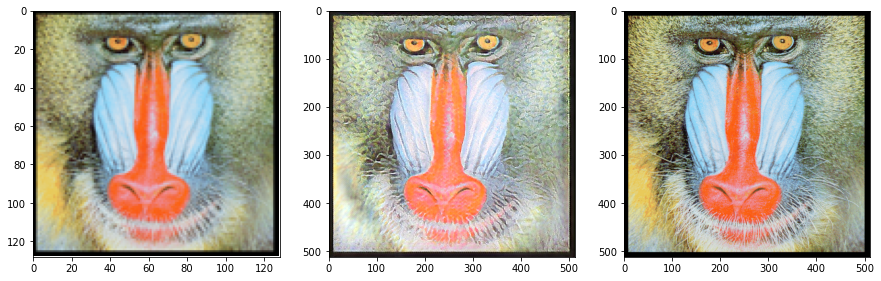

In [7]:
# placeholder code for displaying an image from generator
with torch.no_grad():
    img_lr = datahandler.get_sample_by_name('baboon', 128)
    img_hr = datahandler.get_sample_by_name('baboon', 512)
    fig, ax = plt.subplots(1, 3, figsize=(15,15))
    display_image(ax[0], img_lr)
    display_image(ax[1], generator.forward(torch.unsqueeze(img_lr.cuda().detach(), 0))[-1].cpu(), reverse_normalization=True)
    display_image(ax[2], img_hr)